In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import time

import os 

from tqdm import tqdm 



In [2]:
Path = "E:/AXEL/UPEM/Machine Learning/Projet_Volcan/Data/"
train = pd.read_csv(Path + "train.csv") 
print("train.csv:")
train

train.csv:


,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429
...,...,...
4426,873340274,15695097
4427,1297437712,35659379
4428,694853998,31206935
4429,1886987043,9598270


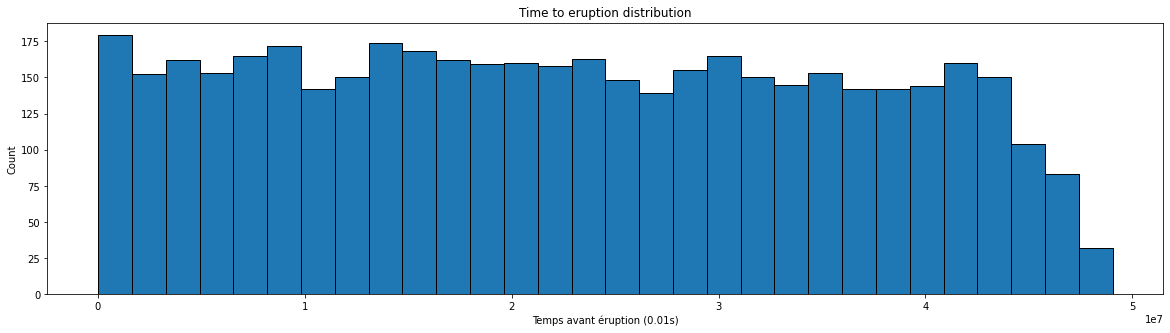

In [3]:
plt.figure(figsize=(20,5))
plt.hist(train['time_to_eruption'], bins=30, edgecolor='black')
plt.ylabel('Count')
plt.xlabel('Temps avant éruption (0.01s)')
plt.title('Time to eruption distribution')
plt.show()

In [4]:
train['time_to_eruption'].describe()

count    4.431000e+03
mean     2.284891e+07
std      1.348439e+07
min      6.250000e+03
25%      1.127016e+07
50%      2.246559e+07
75%      3.434356e+07
max      4.904609e+07
Name: time_to_eruption, dtype: float64

In [5]:
sample_submission = pd.read_csv(Path + "sample_submission.csv") 
print("sample_submission.csv:")
sample_submission

sample_submission.csv:


,segment_id,time_to_eruption
0,1000213997,0
1,100023368,0
2,1000488999,0
3,1001028887,0
4,1001857862,0
...,...,...
4515,996704281,0
4516,997630809,0
4517,998072137,0
4518,998136924,0


## ENSEMBLE DES FICHIERS

In [6]:
train_list = os.listdir(Path + 'train')
test_list = os.listdir(Path + 'test')

print('Nombre de fichiers training: {}'.format(len(train_list)))
print('Nombre de fichiers test: {}'.format(len(test_list )))

Nombre de fichiers training: 4431
Nombre de fichiers test: 4520


## Presentation d'un fichier de type 60001x2

In [7]:
data_0 = pd.read_csv(Path + "train/" + train_list[0]) 
print(train_list[0],":")
data_0

1000015382.csv :


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,260.0,64.0,-232.0,-36.0,-2.0,-35.0,103.0,389.0,67.0,41.0
1,233.0,175.0,146.0,160.0,-4.0,29.0,-120.0,498.0,59.0,63.0
2,216.0,236.0,321.0,202.0,2.0,113.0,-230.0,554.0,97.0,90.0
3,156.0,205.0,382.0,6.0,12.0,70.0,-228.0,580.0,141.0,122.0
4,158.0,101.0,272.0,-154.0,16.0,45.0,-162.0,624.0,145.0,154.0
...,...,...,...,...,...,...,...,...,...,...
59996,245.0,75.0,-306.0,307.0,-49.0,118.0,361.0,824.0,-25.0,371.0
59997,248.0,29.0,-398.0,145.0,-29.0,196.0,308.0,892.0,-38.0,408.0
59998,146.0,-100.0,-525.0,10.0,-5.0,344.0,217.0,837.0,-137.0,509.0
59999,86.0,-275.0,-619.0,-72.0,16.0,354.0,171.0,602.0,7.0,648.0


In [8]:
data_0.dtypes

sensor_1     float64
sensor_2     float64
sensor_3     float64
sensor_4     float64
sensor_5     float64
sensor_6     float64
sensor_7     float64
sensor_8     float64
sensor_9     float64
sensor_10    float64
dtype: object

In [9]:
data_0.isna().sum()

sensor_1       0
sensor_2     154
sensor_3       0
sensor_4       0
sensor_5       0
sensor_6       0
sensor_7       0
sensor_8       0
sensor_9       0
sensor_10      0
dtype: int64

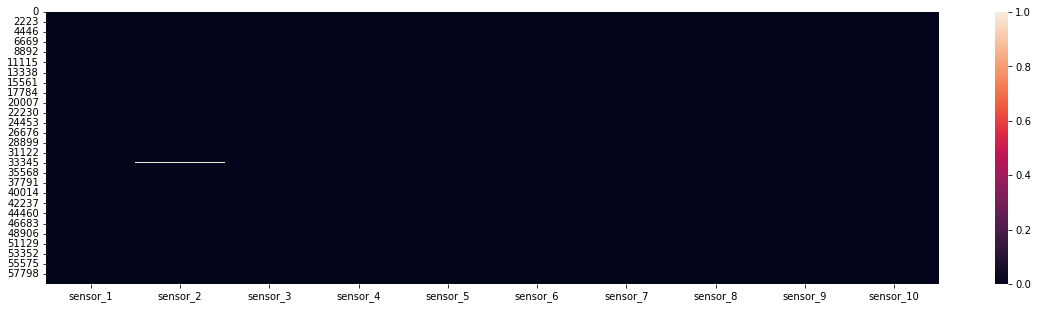

In [10]:
plt.figure(figsize=(20,5))
sns.heatmap(data_0.isna());


In [11]:
data_0 = data_0.fillna(0)

## Extraction features avec tsfresh

In [12]:
from tsfresh.feature_extraction import extract_features,EfficientFCParameters


def features_generator(file):
    data_features  = pd.read_csv(Path + 'train/' + file) 
    ID = int(file.split('.')[0]) 
    data_features['segment_id'] = ID 
    data_features = data_features.fillna(0) 

    extracted_features = extract_features(data_features.iloc[:,:], 
                                           column_id = 'segment_id', 
                                           default_fc_parameters=EfficientFCParameters(), #creation features
                                           disable_progressbar = True
                                          )
    return extracted_features

In [21]:
start_time = time.time()

data_0_feature_all = features_generator(train_list[0])

end_time = time.time()  
execution_time = end_time - start_time
print("Temps d'éxectution :",execution_time) 

Temps d'éxectution : 375.19970202445984


In [22]:
data_0_feature_all

,sensor_1__variance_larger_than_standard_deviation,sensor_1__has_duplicate_max,sensor_1__has_duplicate_min,sensor_1__has_duplicate,sensor_1__sum_values,sensor_1__abs_energy,sensor_1__mean_abs_change,sensor_1__mean_change,sensor_1__mean_second_derivative_central,sensor_1__median,...,sensor_9__permutation_entropy__dimension_5__tau_1,sensor_9__permutation_entropy__dimension_6__tau_1,sensor_9__permutation_entropy__dimension_7__tau_1,sensor_9__query_similarity_count__query_None__threshold_0.0,"sensor_9__matrix_profile__feature_""min""__threshold_0.98","sensor_9__matrix_profile__feature_""max""__threshold_0.98","sensor_9__matrix_profile__feature_""mean""__threshold_0.98","sensor_9__matrix_profile__feature_""median""__threshold_0.98","sensor_9__matrix_profile__feature_""25""__threshold_0.98","sensor_9__matrix_profile__feature_""75""__threshold_0.98"
1000015382,1.0,0.0,0.0,1.0,22935.0,746657383.0,28.38495,-0.002617,0.000367,0.0,...,3.909746,5.199816,6.527141,NaN,1.606848,7.746346,4.066327,3.980172,3.464591,4.601171


In [23]:
data_0_feature_all.columns

Index(['sensor_1__variance_larger_than_standard_deviation',
       'sensor_1__has_duplicate_max', 'sensor_1__has_duplicate_min',
       'sensor_1__has_duplicate', 'sensor_1__sum_values',
       'sensor_1__abs_energy', 'sensor_1__mean_abs_change',
       'sensor_1__mean_change', 'sensor_1__mean_second_derivative_central',
       'sensor_1__median',
       ...
       'sensor_9__permutation_entropy__dimension_5__tau_1',
       'sensor_9__permutation_entropy__dimension_6__tau_1',
       'sensor_9__permutation_entropy__dimension_7__tau_1',
       'sensor_9__query_similarity_count__query_None__threshold_0.0',
       'sensor_9__matrix_profile__feature_"min"__threshold_0.98',
       'sensor_9__matrix_profile__feature_"max"__threshold_0.98',
       'sensor_9__matrix_profile__feature_"mean"__threshold_0.98',
       'sensor_9__matrix_profile__feature_"median"__threshold_0.98',
       'sensor_9__matrix_profile__feature_"25"__threshold_0.98',
       'sensor_9__matrix_profile__feature_"75"__threshol

# Datavisualisation train[0]

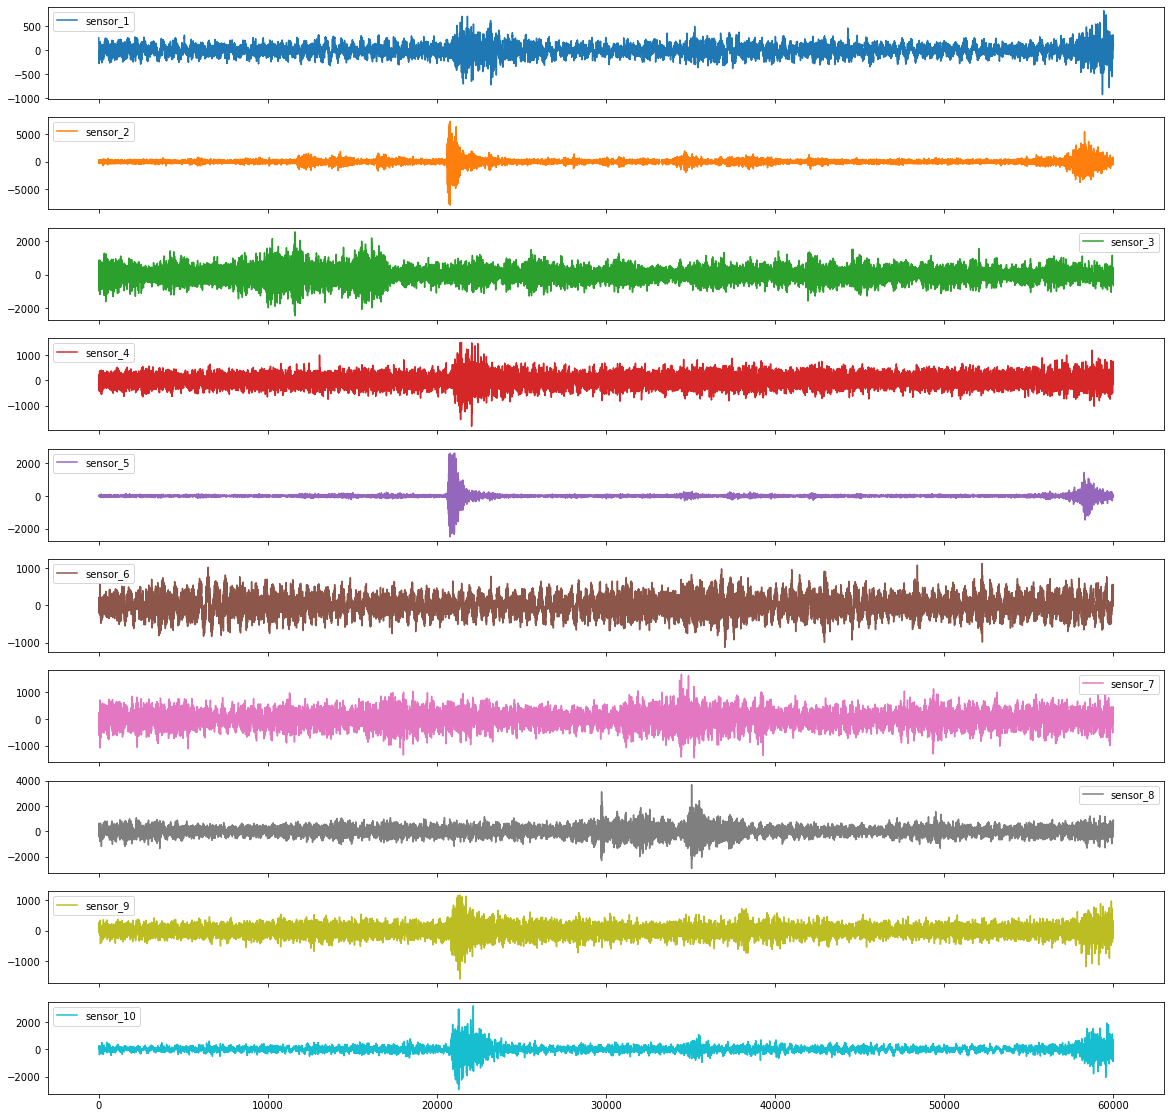

In [24]:
data_0.plot(figsize=(20,20), subplots=True);

## Construction dataframeFeature avec un fichier  : train[0]

In [25]:
part_remove = ".csv"
def ID(file):  
    ID_number = train_list[0].replace(part_remove, "")
    ID = int(ID_number) 
    return ID

train[train['segment_id'] == ID(train_list[0])]

,segment_id,time_to_eruption
1901,1000015382,16258654


In [26]:
analyse = pd.DataFrame(data_0.describe().iloc[1:, :].unstack()).reset_index()#.rename(columns={0: 'value'})

#creation colonne , en concaténant les valeurs des 2 autres colonnes 
analyse['feature'] = analyse['level_0'] + '_' + analyse['level_1']

analyse_del = analyse.drop(['level_0', 'level_1'], axis=1)

analyse_del_2 = analyse_del.set_index('feature')


analyse_del_3 = analyse_del_2.T
analyse_del_3['time_to_eruption'] = train[train.segment_id == ID(train_list[0])].time_to_eruption.values[0]
analyse_del_3


feature,sensor_1_mean,sensor_1_std,sensor_1_min,sensor_1_25%,sensor_1_50%,sensor_1_75%,sensor_1_max,sensor_2_mean,sensor_2_std,sensor_2_min,...,sensor_9_75%,sensor_9_max,sensor_10_mean,sensor_10_std,sensor_10_min,sensor_10_25%,sensor_10_50%,sensor_10_75%,sensor_10_max,time_to_eruption
0,0.382244,111.553322,-920.0,-66.0,0.0,67.0,822.0,2.260746,451.161018,-7871.0,...,106.0,1162.0,0.896752,249.024286,-2961.0,-117.0,0.0,119.0,3179.0,16258654


In [27]:
df_skew = pd.DataFrame(data_0.skew()).T

for column in df_skew.select_dtypes('float'): #va le faire pour chaque colonne de type float
    df_skew.rename(columns={column: column+'_skew'}, inplace=True)

df_kurtosis = pd.DataFrame(data_0.kurtosis()).T
for column in df_kurtosis.select_dtypes('float'): #va le faire pour chaque colonne de type float
    df_kurtosis.rename(columns={column: column+'_kurtosis '}, inplace=True)


In [28]:
df_final_0 = pd.merge(df_skew, df_kurtosis, left_index=True, right_index=True)
df_final_0 = pd.merge(df_final_0, analyse_del_3, left_index=True, right_index=True)
df_final_0

,sensor_1_skew,sensor_2_skew,sensor_3_skew,sensor_4_skew,sensor_5_skew,sensor_6_skew,sensor_7_skew,sensor_8_skew,sensor_9_skew,sensor_10_skew,...,sensor_9_75%,sensor_9_max,sensor_10_mean,sensor_10_std,sensor_10_min,sensor_10_25%,sensor_10_50%,sensor_10_75%,sensor_10_max,time_to_eruption
0,-0.012046,0.022975,0.04275,0.03852,0.050072,0.033943,-0.017751,0.00181,-0.074676,0.058227,...,106.0,1162.0,0.896752,249.024286,-2961.0,-117.0,0.0,119.0,3179.0,16258654


In [114]:
#datavisualisation NaN sur l'ensemble des fichiers de tyoe train

missing_value_features = []

for file in tqdm(train_list):
    data_file = pd.read_csv(Path + 'train/' + file)
    missing_value_features_file = data_file.isna().sum()
    missing_value_features.append(missing_value_features_file)
    
        
count_NaN= sum(missing_value_features)        
   
print(f"Nombre de NaN dans les fichiers train : {sum(count_NaN)/(len(train_list)*600000)}")

100%|██████████| 4431/4431 [05:23<00:00, 13.71it/s]


Nombre de NaN dans les fichiers train : 0.0637100379899195


## Fonction pour automatiser la construction du nouveau dataset feature

In [29]:
def create_df_feature(data_file,data_target,type_data):
    
    df = data_file.fillna(0) 
  
    #données stats pour creer nos features   
    df_feature = df.describe().iloc[1:, :]
    df_feature.loc['skew'] = df.skew().tolist() 
    df_feature.loc['kurtosis'] = df.kurtosis().tolist()
    df_feature.loc['mad'] = df.mad().tolist() 
    df_feature.loc['mode'] = df.mode().iloc[0].tolist() 
    df_feature.loc['median'] = df.median().tolist() 
    
    str_col = f"{1}%"
    df_feature.loc[str_col] = df.quantile(0.01).tolist()
    for i in range(5, 100, 5):
        if ((i!=25) and (i!=50) and (i!=75)):
                str_col = f"{i}%"
                int_col = float(i)/100
                df_feature.loc[str_col] = df.quantile(int_col).tolist() 
    str_col = f"{99}%"            
    df_feature.loc[str_col] = df.quantile(0.99).tolist()
        
    df_feature = df_feature.unstack().reset_index()
    df_feature = df_feature.rename(columns={0: 'value'}) 
    df_feature['feature'] = df_feature['level_0'] + '_' + df_feature['level_1']
    df_feature = df_feature.drop(['level_0', 'level_1'], axis=1).set_index('feature').T
    
    if type_data == 'train':
        df_feature['time_to_eruption'] = data_target
        
    return df_feature

## Construction du DataframeFeature sur les fichiers train


In [30]:
start_time = time.time()
data_train_final = pd.DataFrame() 

for file in tqdm(train_list):
    data_file = pd.read_csv(Path + 'train/' + file) 
    data_target = train[train.segment_id == int(file.split('.')[0])].time_to_eruption.values[0] 
    data_train = create_df_feature(data_file, data_target, 'train') 
  
    data_train_final = data_train_final.append(data_train)
      

end_time = time.time()  
execution_time = end_time - start_time
print("Temps d'éxectution :",execution_time,"secondes") 

100%|██████████| 4431/4431 [26:38<00:00,  2.77it/s]

Temps d'éxectution : 1598.2998971939087 secondes


In [36]:
data_train_feature = data_train_final.reset_index()
data_train_feature=data_train_feature.drop('index',axis=1)

data_train_feature

feature,sensor_1_mean,sensor_1_std,sensor_1_min,sensor_1_25%,sensor_1_50%,sensor_1_75%,sensor_1_max,sensor_1_skew,sensor_1_kurtosis,sensor_1_mad,...,sensor_10_55%,sensor_10_60%,sensor_10_65%,sensor_10_70%,sensor_10_80%,sensor_10_85%,sensor_10_90%,sensor_10_95%,sensor_10_99%,time_to_eruption
0,0.382244,111.553322,-920.0,-66.0,0.0,67.0,822.0,-0.012046,2.873691,83.790815,...,21.0,43.0,67.0,91.0,150.0,188.0,238.0,328.0,732.0,16258654
1,-3.828120,532.160723,-2039.0,-356.0,0.0,348.0,2293.0,0.014968,0.154876,421.908923,...,127.0,254.0,389.0,535.0,861.0,1068.0,1328.0,1725.0,2491.0,6347792
2,8.291928,608.823318,-2193.0,-400.0,0.0,414.0,2524.0,0.062943,0.034508,484.108702,...,153.0,310.0,466.0,636.0,1015.0,1253.0,1559.0,1995.0,2893.0,5120693
3,2.071582,414.293195,-3112.0,-246.0,0.0,252.0,4085.0,0.101869,3.927669,311.949215,...,78.0,159.0,241.0,331.0,540.0,669.0,850.0,1156.0,1898.0,10393161
4,0.904102,289.861921,-1723.0,-187.0,0.0,184.0,1692.0,0.022172,0.824943,225.736476,...,101.0,202.0,307.0,418.0,689.0,868.0,1121.0,1604.0,2648.0,20549733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,-2.065582,223.901241,-1533.0,-131.0,0.0,128.0,1865.0,0.023902,2.828362,166.446855,...,55.0,113.0,173.0,234.0,379.0,468.0,595.0,787.0,1196.0,23064624
4427,0.822920,441.541874,-4582.0,-279.0,0.0,275.0,3727.0,0.052117,1.902459,339.720369,...,91.0,182.0,275.0,371.0,594.0,731.0,905.0,1166.0,1657.0,46296746
4428,2.583740,441.391224,-2606.0,-282.0,0.0,292.0,2373.0,-0.014115,0.696296,345.351123,...,97.0,196.0,298.0,410.0,658.0,817.0,1033.0,1352.0,1980.0,24733042
4429,-1.414143,394.273260,-1664.0,-264.0,0.0,258.0,1591.0,0.013074,0.368570,310.197749,...,87.0,171.0,262.0,357.0,579.0,719.0,888.0,1166.0,1784.0,40656101


## Machine Learning

In [51]:
from sklearn.model_selection import train_test_split,learning_curve


from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [41]:
df_modele = data_train_feature

X_train = df_modele.drop(labels = "time_to_eruption", axis = 1) #features
y_train = df_modele["time_to_eruption"] #target
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.20, random_state = 94,shuffle=True)
print("X Train: ",len(X_train)) 
print("X Test: ",len(X_test)) 
print("y Train: ",len(y_train))
print("y Test: ",len(y_test)) 

X Train:  3544
X Test:  887
y Train:  3544
y Test:  887


In [42]:
#evalution score de differents modeles avec hyperparametre par defaut


dict_models = {'Régression Logistique' : LogisticRegression, 
               'Forêt aléatoire' : RandomForestRegressor,
               'Arbres de décision' : DecisionTreeRegressor,
               'GBM' : LGBMRegressor,'XGBoost' : XGBRegressor}

for name, model in dict_models.items():
               
    start_time = time.time()
    modele = model(random_state=94)
    modele.fit(X_train,y_train) 
    y_pred = modele.predict(X_test)

    end_time = time.time()
    execution_time = end_time - start_time

    
    print(f"Temps d'éxectution du modèle {name} : {execution_time}")
    print(f"Score R2 : {r2_score(y_test, y_pred)}")
    print(f"MAE: {mae(y_test, y_pred)}")

C:\Users\axelp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Temps d'éxectution du modèle Régression Logistique : 107.14316320419312
Score R2 : 0.23458687794689403
MAE: 7291280.599774521
Temps d'éxectution du modèle Forêt aléatoire : 51.627537965774536
Score R2 : 0.7783257957146237
MAE: 4391018.603404735
Temps d'éxectution du modèle Arbres de décision : 0.8825569152832031
Score R2 : 0.4040899717227683
MAE: 5566918.549041714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67683
[LightGBM] [Info] Number of data points in the train set: 3544, number of used features: 279
[LightGBM] [Info] Start training from score 22686368.703160
Temps d'éxectution du modèle GBM : 1.347071647644043
Score R2 : 0.7777922612388181
MAE: 4615225.300958177
Temps d'éxectution du modèle XGBoost : 3.896622657775879
Score R2 : 0.7643193994119231
MAE: 4760189.113690812


## LightGBM Regression : Hyperparametre par défaut 

In [48]:
start_time = time.time()

lgb = LGBMRegressor( random_state = 94,verbose=-1) 
lgb.fit(X_train,y_train) 

end_time = time.time()
execution_time = end_time - start_time
print("Temps d'éxectution du modèle LightGBM :",execution_time)

y_pred = lgb.predict(X_test)

print(f"Score R2 : {r2_score(y_test, y_pred)}")
print(f"MAE: {mae(y_test, y_pred)}")

Temps d'éxectution du modèle LightGBM : 1.1405766010284424
Score R2 : 0.7777922612388181
MAE: 4615225.300958177


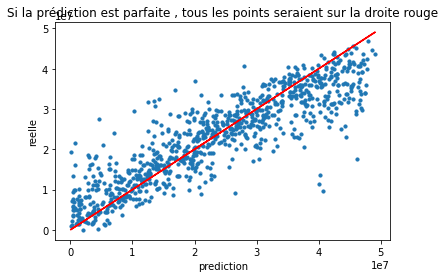

In [49]:
#Comparaison valeur prédite et valeur attendue

plt.scatter(y_test,y_pred,s=10)
plt.title("LGBM Standart")
plt.plot(y_test, y_test, color='red')
plt.xlabel("prediction")
plt.ylabel("reelle")
plt.show()

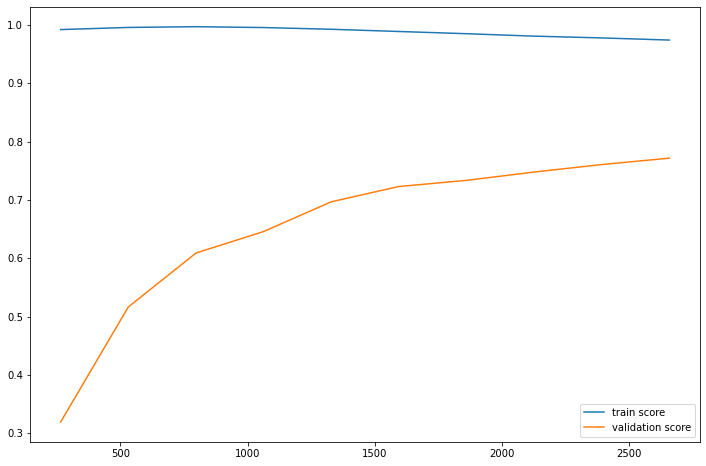

In [68]:
# Graphe pour mesurer l'overfitting

N, train_score, valid_score = learning_curve(lgb, X_train, y_train, cv=4, scoring='r2', 
                                               train_sizes=np.linspace(0.1, 1, 10))
    
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, valid_score.mean(axis=1), label='validation score')
plt.legend();

## LightGBM Regression : Sélection de feature

In [61]:
#SELECTION FEATURE, trouver le meilleur seuil pour ameliorer la prédiction


best_r2 = r2_score(y_test, y_pred) # score r2 du modele sans selection de feature
best_mae = mae(y_test, y_pred) #score mae du modele sans selection de feature
                   
for i in np.arange(0,0.3,0.01): #variation du treshold pour sélectionner les variables en fonction de la matrice de corrélation 
    drop_cols = list()
    for col in df_modele.columns.tolist():
        if col == 'time_to_eruption':
            drop_cols.append(col)
        if abs(df_modele[col].corr(df_modele['time_to_eruption'])) < i: 
            drop_cols.append(col)
    X_selection_train = df_modele.copy() #ensemble du dataset
    y_selection_train = df_modele["time_to_eruption"]

    X_selection_train = X_selection_train.drop(drop_cols, axis=1)

    X_selection_train,X_selection_test, y_selection_train, y_selection_test = train_test_split(X_selection_train,
                                                                                               y_selection_train,
                                                                                               test_size = 0.2,
                                                                                               random_state = 94)         

    # creation modèle pour chaque nouveau dataset slection_feature 
    lgb_selection = LGBMRegressor(random_state = 94,verbose=-1)  
    lgb_selection.fit(X_selection_train,y_selection_train)
    prediction_selection_train = lgb_selection.predict(X_selection_test)
    
    if(r2_score(y_selection_test, prediction_selection_train)>best_r2):
        best_r2 = r2_score(y_selection_test, prediction_selection_train)
        float_r2 = i
        
        
    if(mae(y_selection_test, prediction_selection_train)<best_mae):
        best_mae = mae(y_selection_test, prediction_selection_train)
        float_mae = i
        #on gardera le modèle qui aura le meilleur score MAE
        count_feature_clean = len(drop_cols)-1
        list_feature_clean = drop_cols
       
    
print(f"Le meilleur R2 SCORE est {best_r2}, il est obtenu au seuil {float_r2}")  
print(f"Le meilleur MAE est {best_mae}, il est obtenu au seuil {float_mae}")
print(f"Nombre de features rétirés pour maximiser le R2 score : {count_feature_clean}")
print(f"Liste des features retirés : {list_feature_clean[:-1]}")#pour ne pas afficher la target qui est le dernier element de la liste

Le meilleur R2 SCORE est 0.8026171433055698, il est obtenu au seuil 0.08
Le meilleur MAE est 4252336.696685472, il est obtenu au seuil 0.09
Nombre de features rétirés pour maximiser le R2 score : 43
Liste des features retirés : ['sensor_1_mean', 'sensor_1_skew', 'sensor_1_kurtosis', 'sensor_1_mode', 'sensor_2_mean', 'sensor_2_skew', 'sensor_2_kurtosis', 'sensor_2_mode', 'sensor_3_mean', 'sensor_3_skew', 'sensor_3_kurtosis', 'sensor_3_mode', 'sensor_4_mean', 'sensor_4_skew', 'sensor_4_kurtosis', 'sensor_4_mode', 'sensor_5_mean', 'sensor_5_skew', 'sensor_5_kurtosis', 'sensor_5_mode', 'sensor_6_mean', 'sensor_6_skew', 'sensor_6_kurtosis', 'sensor_6_mode', 'sensor_7_mean', 'sensor_7_min', 'sensor_7_skew', 'sensor_7_kurtosis', 'sensor_7_mode', 'sensor_8_mean', 'sensor_8_min', 'sensor_8_max', 'sensor_8_skew', 'sensor_8_kurtosis', 'sensor_8_mode', 'sensor_9_mean', 'sensor_9_skew', 'sensor_9_kurtosis', 'sensor_9_mode', 'sensor_10_mean', 'sensor_10_skew', 'sensor_10_kurtosis', 'sensor_10_mode']

In [64]:
X_selection_train = df_modele.copy() # dataset avec 300 features + target
X_selection_train = X_selection_train.drop(list_feature_clean, axis=1) #features selectionnées

y_selection_train = df_modele["time_to_eruption"] #target

X_selection_train,X_selection_test, y_selection_train, y_selection_test = train_test_split(X_selection_train, y_selection_train, test_size = 0.20, random_state = 94,shuffle=True)

X_selection_train

feature,sensor_1_std,sensor_1_min,sensor_1_25%,sensor_1_50%,sensor_1_75%,sensor_1_max,sensor_1_mad,sensor_1_median,sensor_1_1%,sensor_1_5%,...,sensor_10_45%,sensor_10_55%,sensor_10_60%,sensor_10_65%,sensor_10_70%,sensor_10_80%,sensor_10_85%,sensor_10_90%,sensor_10_95%,sensor_10_99%
4062,656.655907,-2498.0,-440.0,0.0,428.0,2703.0,519.299447,0.0,-1544.0,-1103.0,...,-141.0,142.0,288.0,431.0,583.0,935.0,1158.0,1440.0,1857.0,2669.0
3192,21182.637579,-32767.0,-17308.0,0.0,17199.0,32767.0,18036.128641,0.0,-32767.0,-32767.0,...,-2830.0,3000.0,6040.0,9251.0,12545.0,20024.0,24860.0,31513.0,32767.0,32767.0
405,102.364239,-583.0,-62.0,0.0,62.0,735.0,77.945269,0.0,-261.0,-166.0,...,-22.0,21.0,43.0,67.0,93.0,157.0,196.0,252.0,363.0,731.0
3270,180.267883,-937.0,-115.0,0.0,118.0,872.0,141.320834,0.0,-431.0,-289.0,...,-39.0,41.0,82.0,126.0,171.0,278.0,345.0,427.0,567.0,861.0
2290,352.728840,-3832.0,-178.0,0.0,188.0,4263.0,242.180207,0.0,-879.0,-483.0,...,-62.0,63.0,130.0,196.0,270.0,447.0,558.0,713.0,976.0,1797.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,171.968910,-808.0,-115.0,0.0,116.0,665.0,136.869677,0.0,-404.0,-282.0,...,-41.0,44.0,87.0,132.0,177.0,281.0,349.0,443.0,583.0,933.0
2226,371.012805,-1658.0,-246.0,0.0,236.0,1857.0,292.279147,0.0,-902.0,-625.0,...,-106.0,108.0,217.0,329.0,449.0,728.0,907.0,1152.0,1521.0,2252.0
1347,98.873681,-568.0,-63.0,0.0,64.0,628.0,76.862099,0.0,-239.0,-159.0,...,-22.0,22.0,44.0,69.0,95.0,157.0,198.0,250.0,344.0,639.0
1381,682.697088,-4207.0,-435.0,0.0,434.0,3737.0,530.596460,0.0,-1639.0,-1096.0,...,-135.0,134.0,266.0,400.0,543.0,863.0,1060.0,1309.0,1712.0,2554.0


In [66]:
#LightGBM Regression Selection feature

start_time = time.time()

lgb_selection = LGBMRegressor(random_state = 94,verbose=-1) 
lgb_selection.fit(X_selection_train,y_selection_train) 

end_time = time.time()
execution_time = end_time - start_time

print("Temps d'éxectution du modèle LightGBM :",execution_time)

y_selection_pred = lgb_selection.predict(X_selection_test) 

print(f"R2 SCORE: {r2_score(y_selection_test, y_selection_pred)}") 
print(f"MAE: {mae(y_selection_test, y_selection_pred)}")

Temps d'éxectution du modèle LightGBM : 0.9413862228393555
R2 SCORE: 0.7978925638900505
MAE: 4252336.696685472


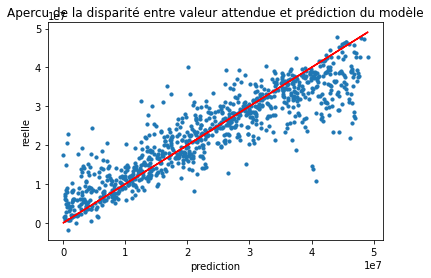

In [67]:
plt.scatter(y_selection_test, y_selection_pred,s=10)
plt.title("LGBM Selection features")
plt.plot(y_test, y_test, color='red')
plt.xlabel("prediction")
plt.ylabel("reelle")
plt.show()

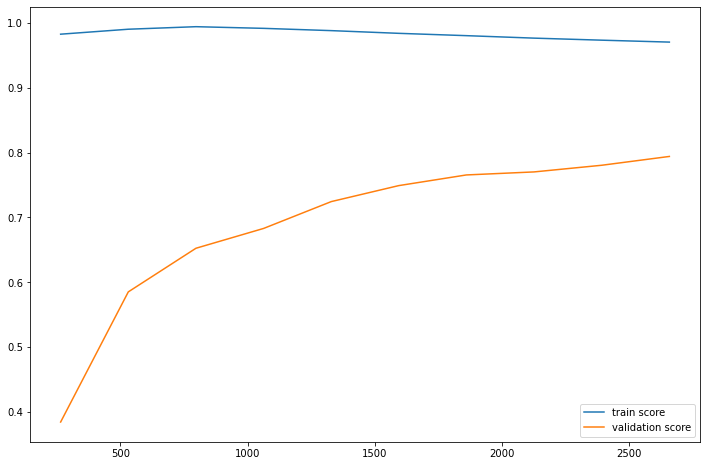

In [69]:
N, train_score, valid_score = learning_curve(lgb_selection, X_selection_train, y_selection_train, cv=4, scoring='r2', 
                                               train_sizes=np.linspace(0.1, 1, 10))
    
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, valid_score.mean(axis=1), label='validation score')
plt.legend();

## LightGBM Regression : Optimisation Hyperparamètres

In [79]:
import optuna
from optuna.samplers import TPESampler #sampler basé sur l'optimisation par processus de Thompson
import optuna.logging

optuna.logging.set_verbosity(optuna.logging.WARNING)

def create_model(trial): #creer modele avec une une plage de parametres
    num_leaves = trial.suggest_int("num_leaves", 10, 35) 
    n_estimators = trial.suggest_int("n_estimators", 100, 300)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    min_child_samples = trial.suggest_int('min_child_samples', 100, 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.99)
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 5, 50)
    bagging_fraction = trial.suggest_float('bagging_fraction', 0.01, 1.0)
    feature_fraction = trial.suggest_float('feature_fraction', 0.01, 1.0)
    model = LGBMRegressor(
        num_leaves=num_leaves,
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_child_samples=min_child_samples, 
        min_data_in_leaf=min_data_in_leaf,
        learning_rate=learning_rate,
        feature_fraction=feature_fraction,
        random_state=94,
        verbose=-1
    )
    return model

def objective(trial):
    model = create_model(trial) #creer en fonction du choix des parametres
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = mae(y_test, preds)
    return score

start_time = time.time()

study = optuna.create_study(direction="minimize", sampler=TPESampler(seed=94)) # minimiser la fonction perte (mae)
study.optimize(objective, n_trials=10000) # Nombre de combinaison à tester 

end_time = time.time()
execution_time = end_time - start_time
print("Temps d'éxectution recherche HyperParamêtre optimal :",execution_time)

Temps d'éxectution recherche HyperParamêtre optimal : 11584.351239681244


In [81]:
 study.best_params

{'num_leaves': 34,
 'n_estimators': 277,
 'max_depth': 10,
 'min_child_samples': 378,
 'learning_rate': 0.06229054745563359,
 'min_data_in_leaf': 10,
 'bagging_fraction': 0.6966183739632194,
 'feature_fraction': 0.05928062602318896}

In [83]:
params = study.best_params
params['random_state'] = 94 
params['verbose'] = -1
print(params)

{'num_leaves': 34, 'n_estimators': 277, 'max_depth': 10, 'min_child_samples': 378, 'learning_rate': 0.06229054745563359, 'min_data_in_leaf': 10, 'bagging_fraction': 0.6966183739632194, 'feature_fraction': 0.05928062602318896, 'random_state': 94, 'verbose': -1}


In [84]:
lgb_param = LGBMRegressor(**params)
lgb_param.fit(X_train, y_train)
y_pred = lgb_param.predict(X_test) 

print(f"R2 SCORE: {r2_score(y_test, y_pred)}") 
print(f"MAE: {mae(y_test, y_pred)}")

R2 SCORE: 0.8354313577147219
MAE: 3812491.1779481545


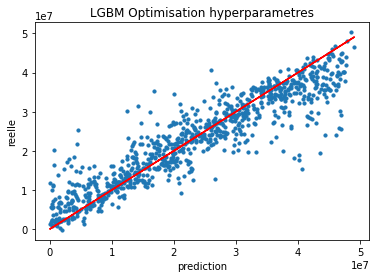

In [85]:
plt.scatter(y_test,y_pred,s=10)
plt.title("LGBM Optimisation hyperparametres")
plt.plot(y_test, y_test, color='red')
plt.xlabel("prediction")
plt.ylabel("reelle")
plt.show()

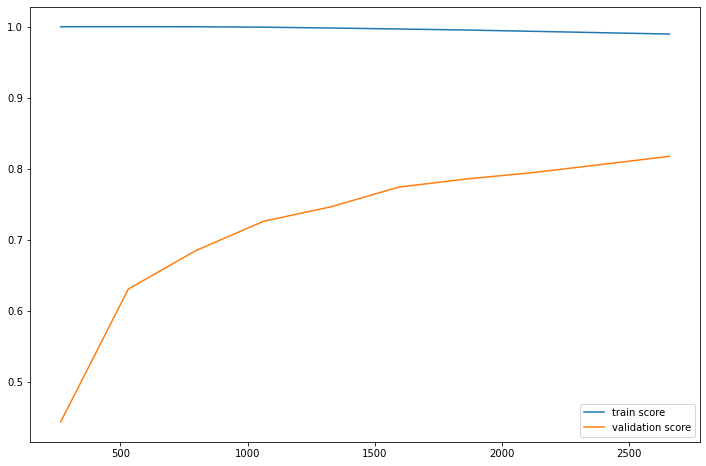

In [86]:
N, train_score, valid_score = learning_curve(lgb_param, X_train, y_train, cv=4, scoring='r2', 
                                               train_sizes=np.linspace(0.1, 1, 10))
    
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, valid_score.mean(axis=1), label='validation score')
plt.legend();

In [87]:
## LightGBM Regression : Sélection de variables + Optimisation Hyperparamètres 

In [88]:
lgb_param_selection = LGBMRegressor(**params)
lgb_param_selection.fit(X_selection_train, y_selection_train)
y_selection_pred = lgb_param_selection.predict(X_selection_test) 

print(f"R2 SCORE: {r2_score(y_selection_test, y_selection_pred)}") 
print(f"MAE: {mae(y_selection_test, y_selection_pred)}")

R2 SCORE: 0.8355140846907267
MAE: 3810626.568587396


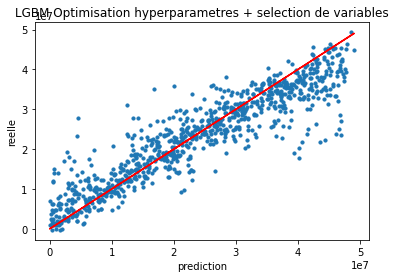

In [91]:
plt.scatter(y_selection_test,y_selection_pred,s=10)
plt.title("LGBM Optimisation hyperparametres + selection de variables")
plt.plot(y_test, y_test, color='red')
plt.xlabel("prediction")
plt.ylabel("reelle")
plt.show()

## Verification Overfitting

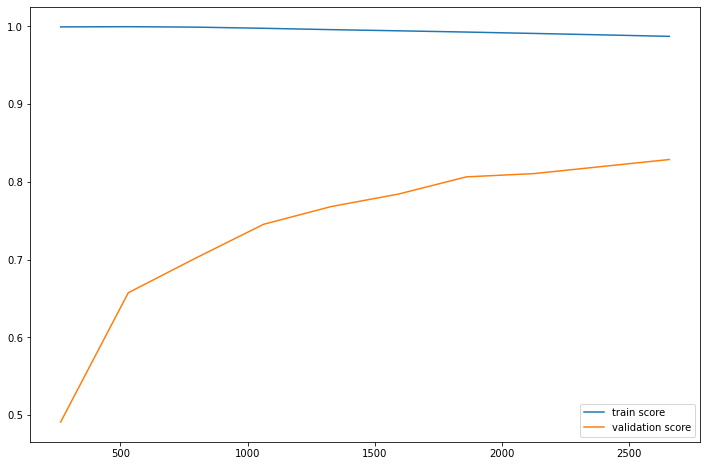

In [92]:
N, train_score, valid_score = learning_curve(lgb_param_selection, X_selection_train, y_selection_train, cv=4, scoring='r2', 
                                               train_sizes=np.linspace(0.1, 1, 10))
    
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, valid_score.mean(axis=1), label='validation score')
plt.legend();

In [93]:
from sklearn.model_selection import cross_val_score, KFold

n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=94)


scores = cross_val_score(lgb_param_selection, X_selection_train,y_selection_train, scoring='neg_mean_absolute_error', cv=folds)
mse_scores = -scores

print("MAE for each fold:", mse_scores)
print("MAE mean:", mse_scores.mean())

r2_scores = cross_val_score(lgb_param_selection, X_selection_train,y_selection_train, scoring='r2', cv=folds)

print("R2 Score for each fold:", r2_scores)
print("R2 Score mean:", r2_scores.mean())

MAE for each fold: [3769314.52163297 3800896.53883795 3881568.3675902  4065917.67084205
 3925819.31639872]
MAE mean: 3888703.2830603784
R2 Score for each fold: [0.83752586 0.82881405 0.82755832 0.82373989 0.82822725]
R2 Score mean: 0.8291730768949426


## Construction du DataframeFeature sur les fichiers train

In [94]:
start_time = time.time()
data_test_final = pd.DataFrame() 

for file in tqdm(test_list):
    data_file = pd.read_csv(Path + 'test/' + file) 
    data_target = None 
    data_test = create_df_feature(data_file, data_target , 'test') 
   
    data_test_final = data_test_final.append(data_test)

end_time = time.time()  
execution_time = end_time - start_time
print("Temps d'éxectution :",execution_time) 

100%|██████████| 4520/4520 [27:54<00:00,  2.70it/s]

Temps d'éxectution : 1674.4094882011414


In [106]:
data_test_feature = data_test_final.reset_index()
data_test_feature=data_test_feature.drop('index',axis=1)
data_test_feature

feature,sensor_1_mean,sensor_1_std,sensor_1_min,sensor_1_25%,sensor_1_50%,sensor_1_75%,sensor_1_max,sensor_1_skew,sensor_1_kurtosis,sensor_1_mad,...,sensor_10_45%,sensor_10_55%,sensor_10_60%,sensor_10_65%,sensor_10_70%,sensor_10_80%,sensor_10_85%,sensor_10_90%,sensor_10_95%,sensor_10_99%
0,4.462476,306.174474,-1319.0,-195.0,0.0,201.0,1347.0,0.018572,0.441816,239.780746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.838103,335.591100,-1268.0,-228.0,0.0,232.0,1214.0,-0.011491,-0.097694,269.067715,...,-71.0,68.0,139.0,213.0,291.0,469.0,579.0,718.0,927.0,1304.0
2,0.794903,352.172248,-3806.0,-193.0,0.0,194.0,4259.0,-0.050056,6.125681,254.199613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.953717,259.030122,-1156.0,-173.0,0.0,177.0,1220.0,0.014705,0.083266,206.508129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.984584,254.306426,-1111.0,-172.0,0.0,167.0,972.0,-0.077960,0.058601,201.760901,...,-64.0,65.0,130.0,199.0,271.0,434.0,536.0,670.0,865.0,1222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,-135.674672,29486.243321,-32767.0,-32767.0,0.0,32767.0,32767.0,0.000677,-1.822876,28082.080125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4516,-2.666439,294.261065,-1291.0,-199.0,0.0,194.0,1032.0,-0.046301,0.060913,234.237444,...,-66.0,66.0,134.0,204.0,279.0,448.0,556.0,685.0,890.0,1280.0
4517,1.192280,371.072752,-3032.0,-225.0,0.0,227.0,2641.0,0.058241,1.870325,282.775171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4518,3.218563,346.656999,-1423.0,-223.0,0.0,223.0,1494.0,0.084854,0.421511,270.839266,...,-95.0,95.0,194.0,297.0,409.0,659.0,813.0,1017.0,1338.0,1989.0


## Prediction

In [108]:
#selection de variable

X_selection_test = data_test_feature.drop(list_feature_clean[:-1], axis=1) 
X_selection_test

feature,sensor_1_std,sensor_1_min,sensor_1_25%,sensor_1_50%,sensor_1_75%,sensor_1_max,sensor_1_mad,sensor_1_median,sensor_1_1%,sensor_1_5%,...,sensor_10_45%,sensor_10_55%,sensor_10_60%,sensor_10_65%,sensor_10_70%,sensor_10_80%,sensor_10_85%,sensor_10_90%,sensor_10_95%,sensor_10_99%
0,306.174474,-1319.0,-195.0,0.0,201.0,1347.0,239.780746,0.0,-726.0,-488.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,335.591100,-1268.0,-228.0,0.0,232.0,1214.0,269.067715,0.0,-773.0,-547.0,...,-71.0,68.0,139.0,213.0,291.0,469.0,579.0,718.0,927.0,1304.0
2,352.172248,-3806.0,-193.0,0.0,194.0,4259.0,254.199613,0.0,-921.0,-526.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,259.030122,-1156.0,-173.0,0.0,177.0,1220.0,206.508129,0.0,-605.0,-417.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,254.306426,-1111.0,-172.0,0.0,167.0,972.0,201.760901,0.0,-618.0,-430.0,...,-64.0,65.0,130.0,199.0,271.0,434.0,536.0,670.0,865.0,1222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,29486.243321,-32767.0,-32767.0,0.0,32767.0,32767.0,28082.080125,0.0,-32767.0,-32767.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4516,294.261065,-1291.0,-199.0,0.0,194.0,1032.0,234.237444,0.0,-702.0,-489.0,...,-66.0,66.0,134.0,204.0,279.0,448.0,556.0,685.0,890.0,1280.0
4517,371.072752,-3032.0,-225.0,0.0,227.0,2641.0,282.775171,0.0,-916.0,-594.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4518,346.656999,-1423.0,-223.0,0.0,223.0,1494.0,270.839266,0.0,-827.0,-560.0,...,-95.0,95.0,194.0,297.0,409.0,659.0,813.0,1017.0,1338.0,1989.0


In [120]:
prediction = lgb_param_selection.predict(X_selection_test)
sample_submission['time_to_eruption'] = prediction

In [121]:
## Affichage du fichier à soumettre avec nos prédictions

In [122]:
sample_submission

,segment_id,time_to_eruption
0,1000213997,1.744552e+07
1,100023368,3.391535e+07
2,1000488999,2.741093e+07
3,1001028887,1.903382e+07
4,1001857862,1.867111e+07
...,...,...
4515,996704281,2.260898e+07
4516,997630809,1.827980e+07
4517,998072137,1.549815e+07
4518,998136924,3.322390e+07


## CREER FICHIER CSV pour le soumettre sur Kaggle

In [119]:
name_fichier = 'Submission.csv'
sample_submission.to_csv(name_fichier, index=False)